# A more structured bottom-up visualisation of ml results

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl

In [6]:
svm_df = pd.read_csv('../ML_results/SVM_permutations/SVM_results.csv')


In [109]:
def get_df_with_same(col1,col2,df, drop_same_cols = True):
    df_ = df[df[col1]==df[col2]]
    if drop_same_cols:
        df_ = df_.drop(col1,axis=1)
        df_ = df_.drop(col2,axis=1)
    return df_

def add_avg_cv_col(df):
    df_ = df
    df_.loc[:,'cv_avg']=df_.loc[:,'cv_1':'cv_5'].mean(axis =1)
    return df_

def drop_cvs(df):
    cvs = ['cv_1','cv_2','cv_3','cv_4','cv_5']
    for cv in cvs:
        df=df.drop(cv,axis = 1)
    return df

def one_hot_to_int(df):
    one_hots = ['machines','tr&v circuits','test circuits']
    for col in one_hots:
        df[col] = df[col].astype(str)
        df[col]=df[col].apply(lambda x: int(x, 2))
    return df

def drop_preproc(df):
    df_ = df.drop('preprocess settings',axis =1)
    return df_

def make_easy2plot(df,drop_nr_q = True):
    df_ = df
    df_ = add_avg_cv_col(df_)
    df_ = drop_cvs(df_)
    df_ = drop_preproc(df_)
    if drop_nr_q:
        df_ = df_.drop('nr_qubits',axis = 1)
    return df_


## 4q

In [104]:
df_4q = svm_df[svm_df['nr_qubits']==4]
df_4q.head()

,nr_qubits,machines,tr&v exp_type,tr&v circuits,test exp_type,test circuits,preprocess settings,kernal,param settings,accuracy,cv_1,cv_2,cv_3,cv_4,cv_5
0,4,1110,Hardware,111,Hardware,111,0,linear,0,0.992248,1.000000,0.980583,1.000000,0.990196,1.000000
1,4,1110,Hardware,111,Simulation,111,0,linear,0,0.256667,NaN,NaN,NaN,NaN,NaN
2,4,1110,Hardware,111,Refreshed_Simulation,111,0,linear,0,0.156667,NaN,NaN,NaN,NaN,NaN
3,4,1110,Hardware,111,Sim and Refreshed,111,0,linear,0,0.206667,NaN,NaN,NaN,NaN,NaN
4,4,1110,Simulation,111,Simulation,111,0,linear,0,0.662500,0.661458,0.588542,0.609375,0.661458,0.645833


### HSR - all circuits


In [36]:
df_4q_all_circ = df_4q[df_4q['tr&v circuits']==111]
df_4q_all_circ.head()

,nr_qubits,machines,tr&v exp_type,tr&v circuits,test exp_type,test circuits,preprocess settings,kernal,param settings,accuracy,cv_1,cv_2,cv_3,cv_4,cv_5
0,4,1110,Hardware,111,Hardware,111,0,linear,0,0.992248,1.000000,0.980583,1.000000,0.990196,1.000000
1,4,1110,Hardware,111,Simulation,111,0,linear,0,0.256667,NaN,NaN,NaN,NaN,NaN
2,4,1110,Hardware,111,Refreshed_Simulation,111,0,linear,0,0.156667,NaN,NaN,NaN,NaN,NaN
3,4,1110,Hardware,111,Sim and Refreshed,111,0,linear,0,0.206667,NaN,NaN,NaN,NaN,NaN
4,4,1110,Simulation,111,Simulation,111,0,linear,0,0.662500,0.661458,0.588542,0.609375,0.661458,0.645833


In [55]:

df_4q_all_circ= get_df_with_same('tr&v circuits','test circuits',df_4q_all_circ)

#### Train on Hardware:

In [56]:
df_4q_c111_tr_H = df_4q_all_circ[df_4q_all_circ['tr&v exp_type']=='Hardware']
df_4q_c111_tr_H = make_easy2plot(df_4q_c111_tr_H)


C:\Users\epste\AppData\Local\Temp\ipykernel_32428\2462721650.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_.loc[:,'cv_avg']=df_.loc[:,'cv_1':'cv_5'].mean(axis =1)


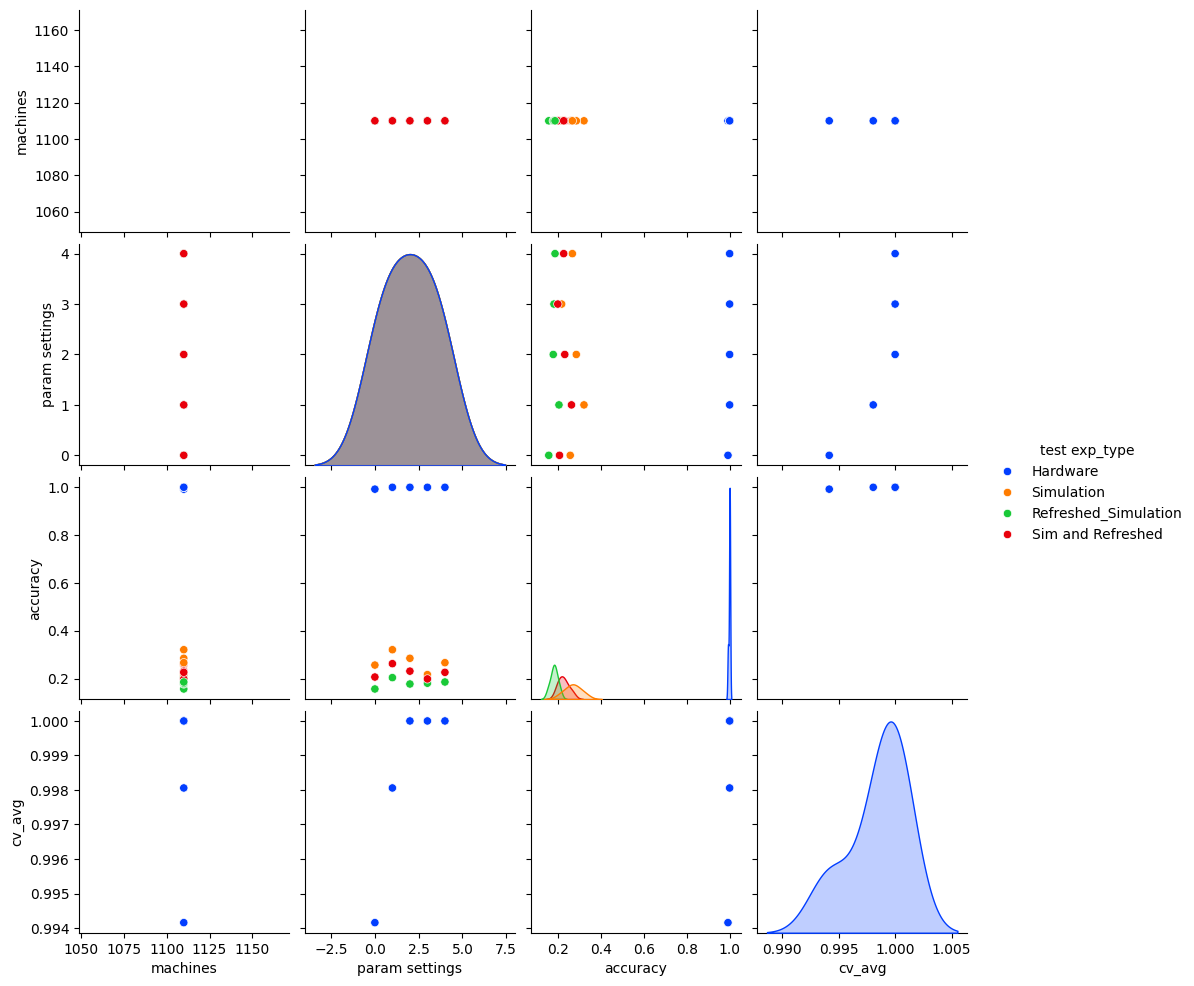

In [58]:
sns.pairplot(data=df_4q_c111_tr_H, hue = 'test exp_type',palette='bright')

<Axes: xlabel='test exp_type', ylabel='accuracy'>

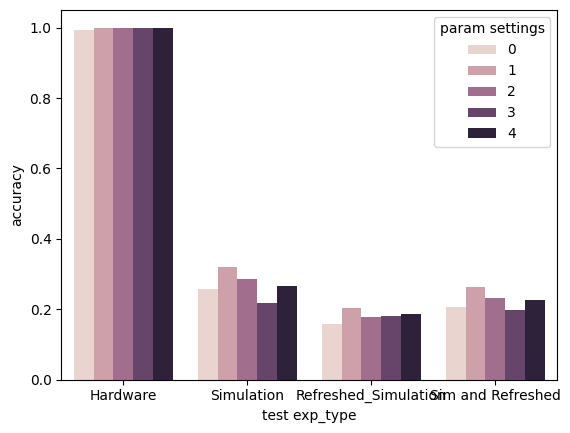

In [73]:
sns.barplot(df_4q_c111_tr_H,x='test exp_type', y='accuracy',hue = 'param settings')

#### Train on Sim

In [60]:
df_4q_c111_tr_S= df_4q_all_circ[df_4q_all_circ['tr&v exp_type']=='Simulation']
df_4q_c111_tr_S = make_easy2plot(df_4q_c111_tr_S)

C:\Users\epste\AppData\Local\Temp\ipykernel_32428\2462721650.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_.loc[:,'cv_avg']=df_.loc[:,'cv_1':'cv_5'].mean(axis =1)


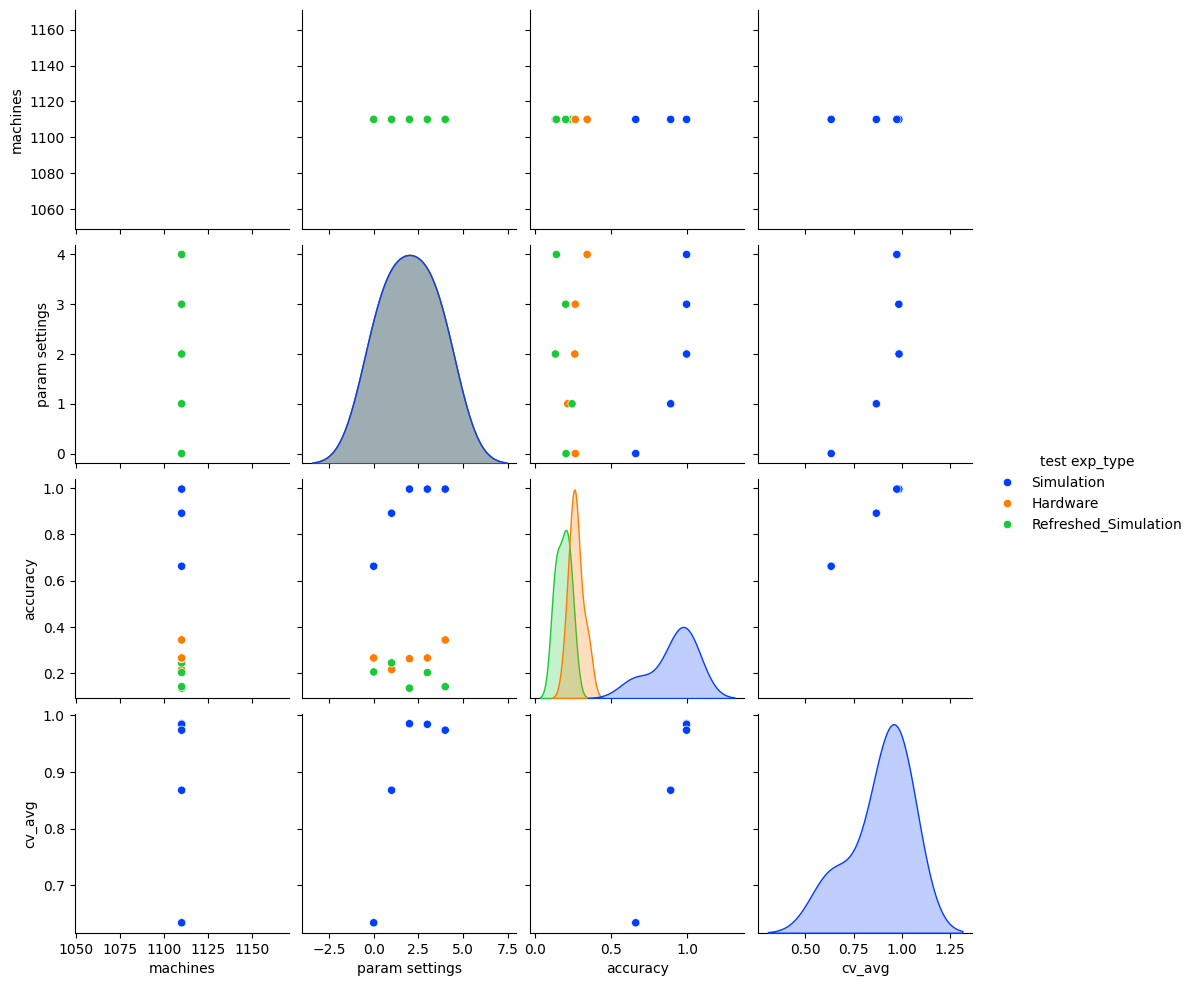

In [61]:
sns.pairplot(data=df_4q_c111_tr_S, hue = 'test exp_type',palette='bright')

<Axes: xlabel='test exp_type', ylabel='accuracy'>

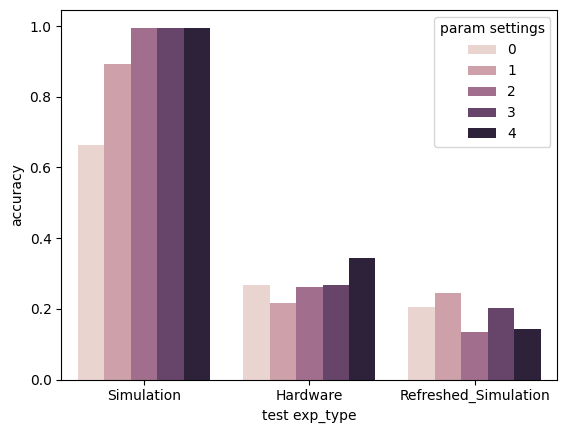

In [72]:
sns.barplot(df_4q_c111_tr_S,x='test exp_type', y='accuracy',hue = 'param settings')

#### Train on Refreshed

In [64]:
df_4q_c111_tr_R= df_4q_all_circ[df_4q_all_circ['tr&v exp_type']=='Simulation']
df_4q_c111_tr_R= make_easy2plot(df_4q_c111_tr_R)

C:\Users\epste\AppData\Local\Temp\ipykernel_32428\2462721650.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_.loc[:,'cv_avg']=df_.loc[:,'cv_1':'cv_5'].mean(axis =1)


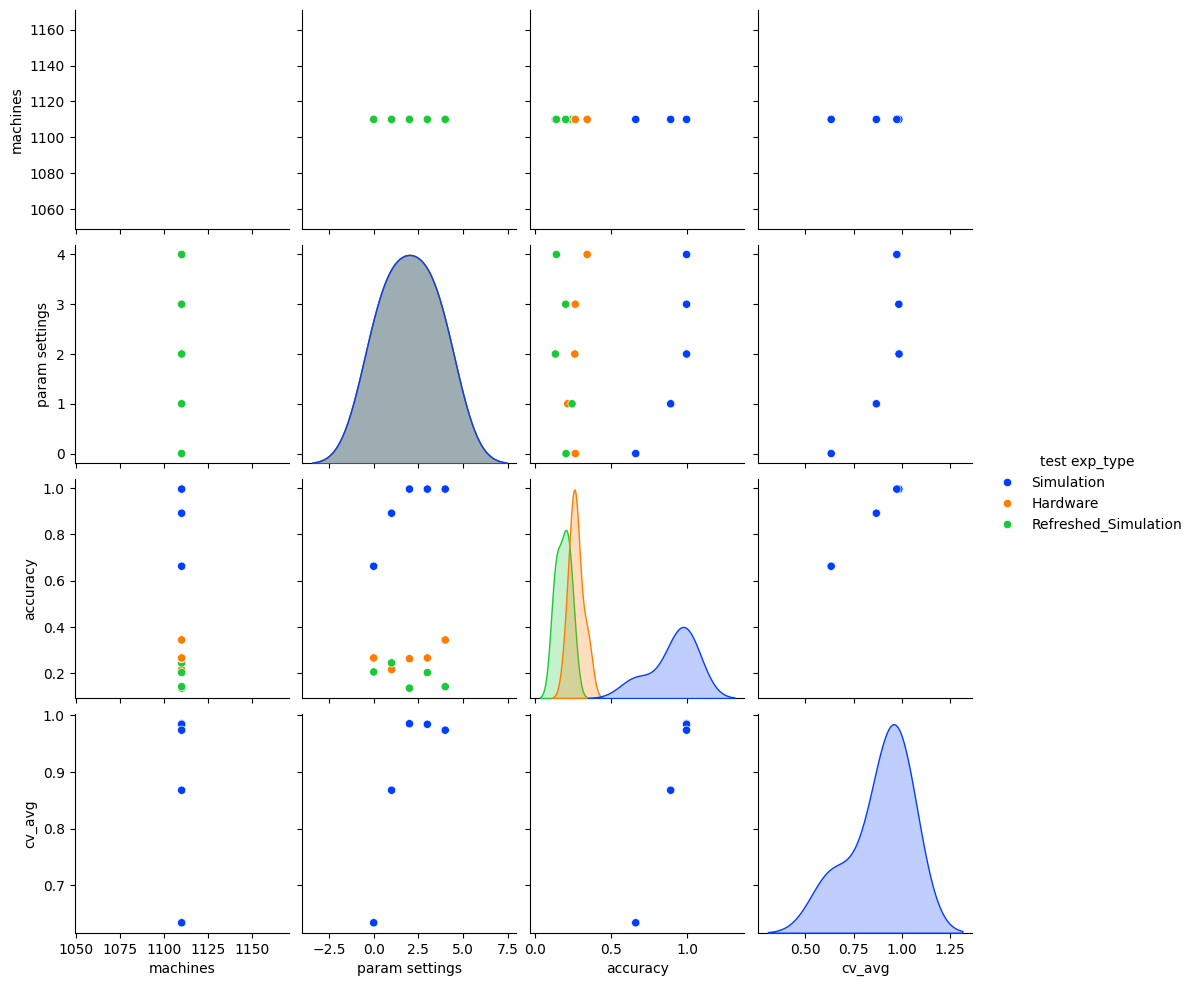

In [65]:
sns.pairplot(data=df_4q_c111_tr_R, hue = 'test exp_type',palette='bright')

<Axes: xlabel='test exp_type', ylabel='accuracy'>

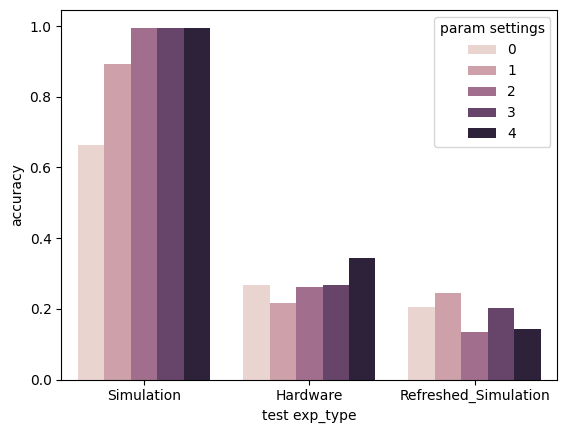

In [71]:
sns.barplot(df_4q_c111_tr_R,x='test exp_type', y='accuracy',hue = 'param settings')

#### all exp_types, param_settings vs accuracy

([0, 1, 2, 3],
 [Text(0, 0, 'Hardware'),
  Text(0, 1, 'Simulation'),
  Text(0, 2, 'Refreshed_Simulation'),
  Text(0, 3, 'Sim and Refreshed')])

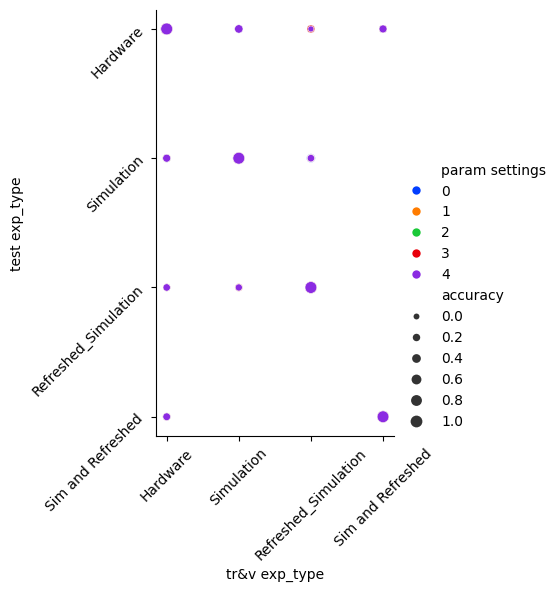

In [ ]:
sns.relplot(df_4q_all_circ,
            x="tr&v exp_type",y = 'test exp_type', size = 'accuracy', hue = 'param settings',
            palette = 'bright',size_norm = tuple([0,1])
            )
mpl.pyplot.xticks(rotation=45)
mpl.pyplot.yticks(rotation=45)

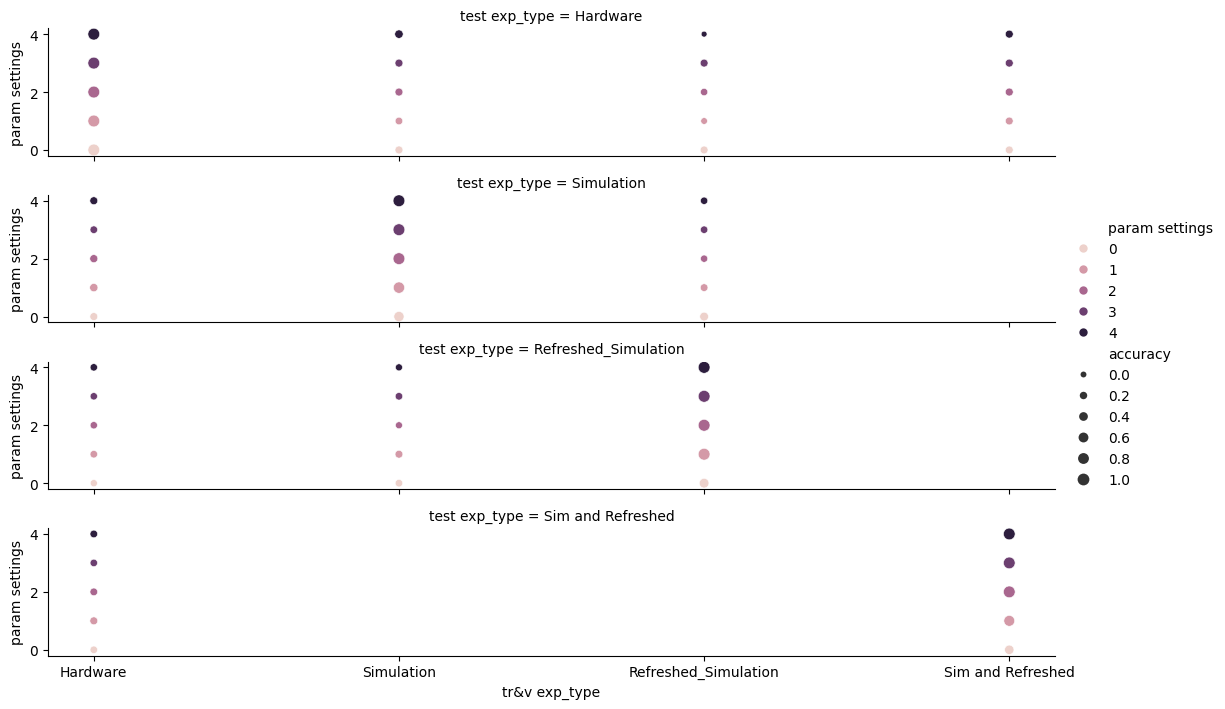

In [ ]:
sns.relplot(
    df_4q_all_circ,
    x ='tr&v exp_type',y = 'param settings',hue = 'param settings',
    size='accuracy',row = 'test exp_type',
    size_norm = tuple([0,1]),
    aspect = 6,
    height = 1.8,
    )


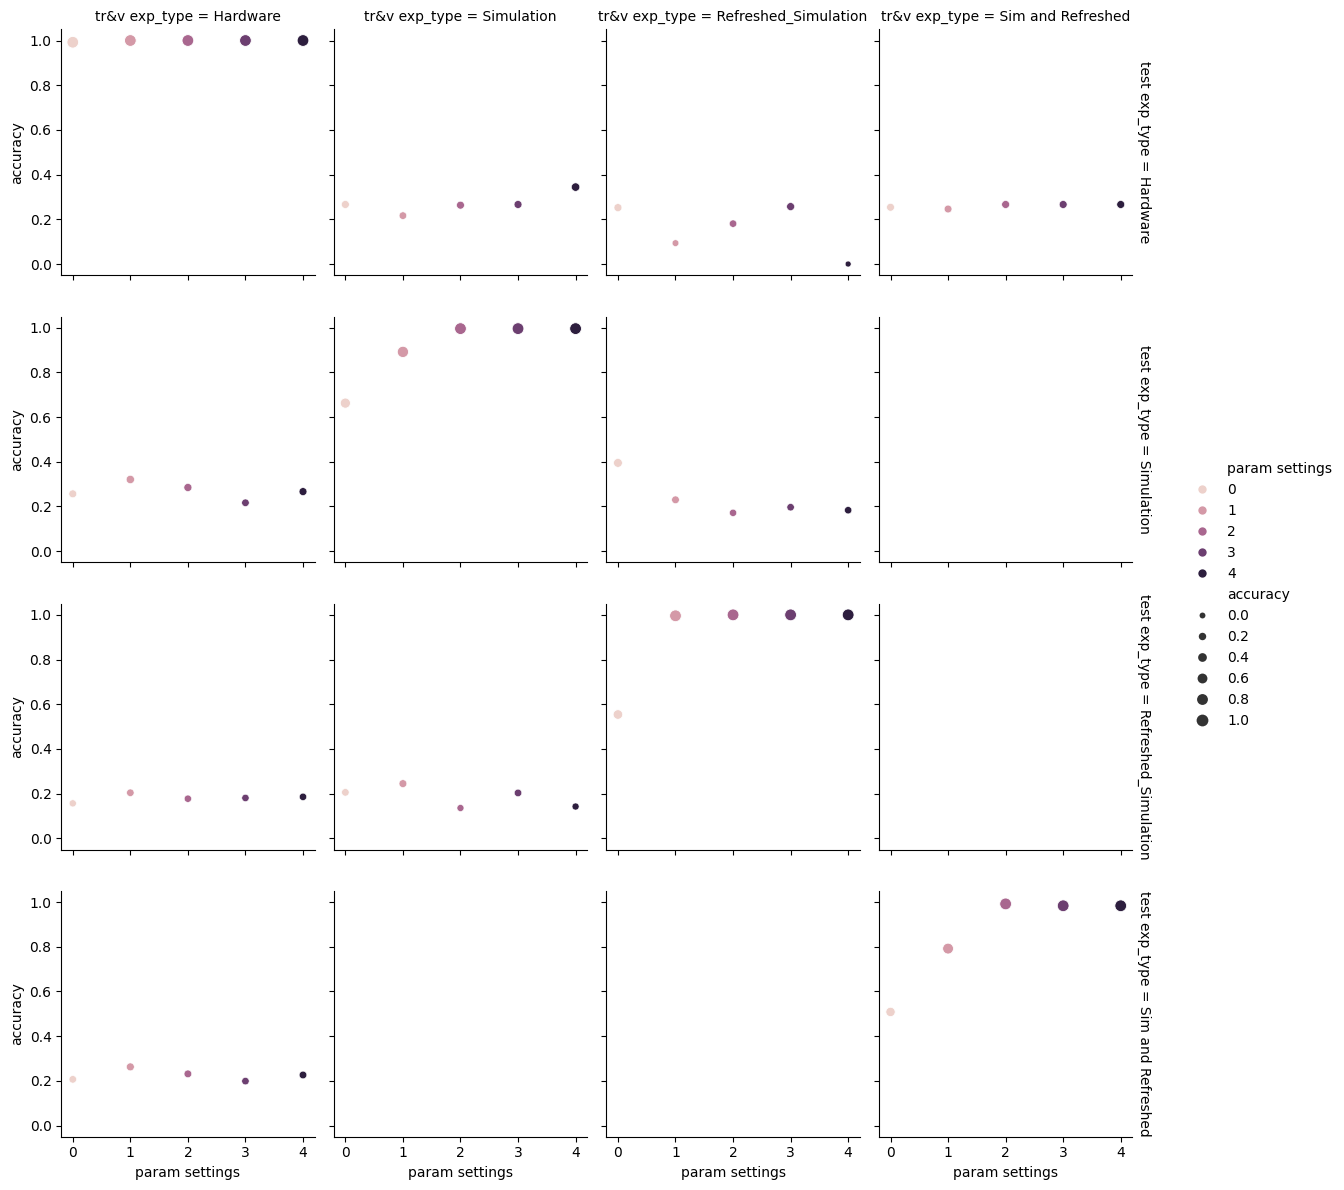

In [190]:
p=sns.relplot(
    df_4q_all_circ,
    x = 'param settings',y = 'accuracy',hue = 'param settings',
    size='accuracy',row = 'test exp_type',col ='tr&v exp_type',
    size_norm = tuple([0,1]),
    height = 3,
    facet_kws={'margin_titles':True}
    )



[Text(42.722222222222214, 0.5, '')]

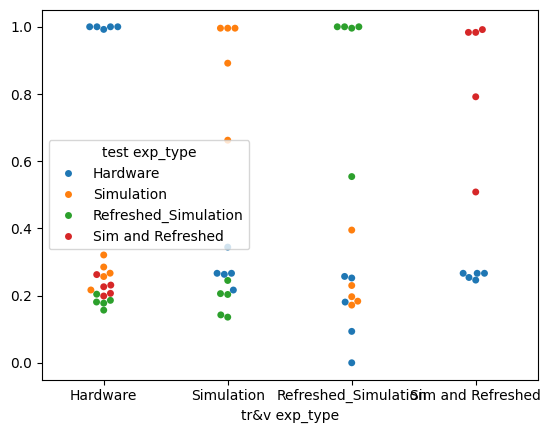

In [82]:
ax = sns.swarmplot(data=df_4q_all_circ, x='tr&v exp_type', y='accuracy',hue = 'test exp_type')
ax.set(ylabel="")

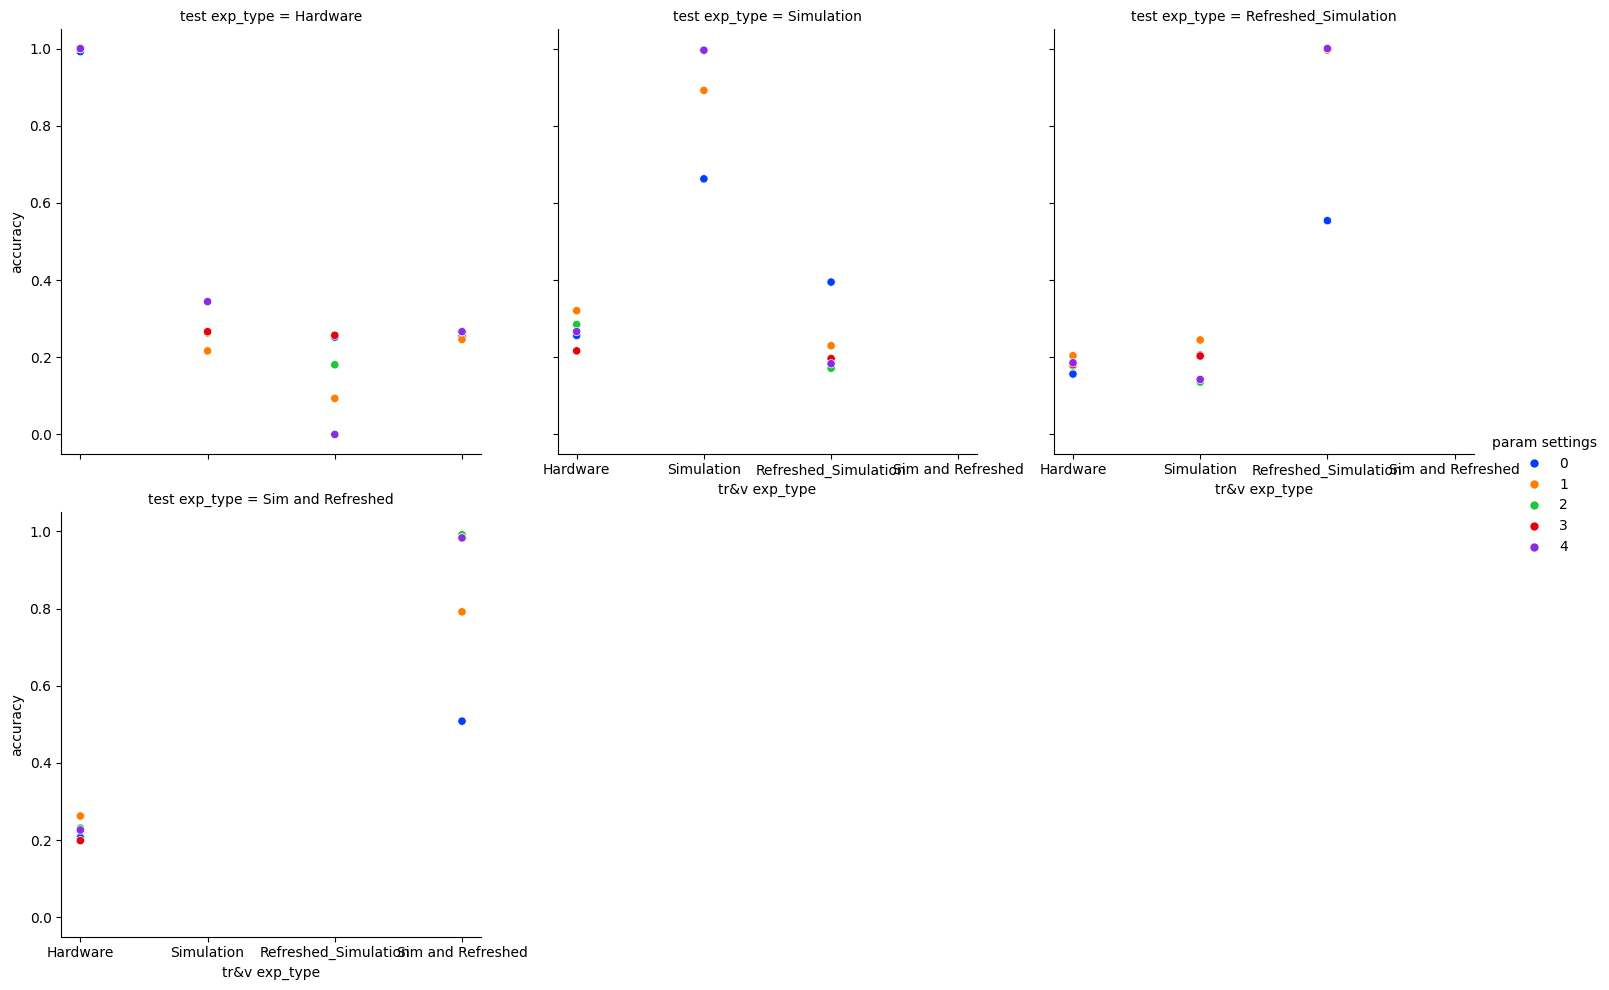

In [89]:
sns.relplot(
    df_4q_all_circ,
    x='tr&v exp_type', y='accuracy',hue = 'param settings',col = 'test exp_type',
    palette='bright',col_wrap=3
    )

In [ ]:
# g = sns.catplot(
#     data=df_4q_all_circ, x='tr&v exp_type', y='accuracy',col='test exp_type',hue='param settings',
#     capsize=.2, palette="YlGnBu_d", errorbar="se",
#     kind="point", height=6, aspect=.75,
# )

### HSR - c1 only

In [103]:
df_4q_c1_HSR = df_4q[df_4q['tr&v circuits']==100]
df_4q_c1_HSR = get_df_with_same('tr&v circuits','test circuits',df_4q_c1_HSR)

[Text(33.847222222222214, 0.5, '')]

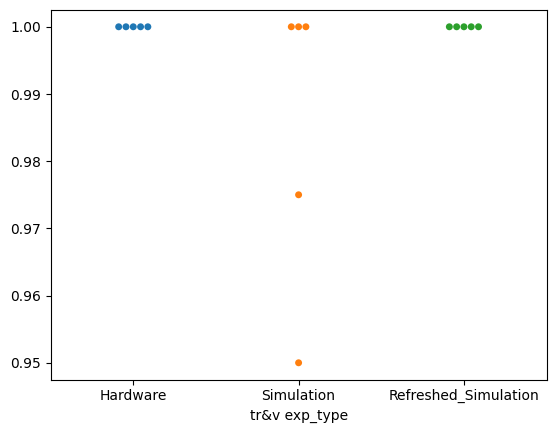

In [ ]:
ax = sns.swarmplot(data=df_4q_c1_HSR, x='tr&v exp_type', y='accuracy',hue = 'test exp_type')
ax.set(ylabel="")

### Circuits Test Table

In [105]:
df_4q_c1 = df_4q[df_4q['tr&v circuits']==100]
#df_4q_c1 = get_df_with_same('tr&v circuits','test circuits',df_4q_c1)

In [106]:
df_4q_c1.head()

,nr_qubits,machines,tr&v exp_type,tr&v circuits,test exp_type,test circuits,preprocess settings,kernal,param settings,accuracy,cv_1,cv_2,cv_3,cv_4,cv_5
60,4,1110,Hardware,100,Hardware,100,0,linear,0,1.000000,0.971429,1.0,1.0,0.970588,1.0
61,4,1110,Hardware,100,Hardware,10,0,linear,0,1.000000,NaN,NaN,NaN,NaN,NaN
62,4,1110,Hardware,100,Hardware,1,0,linear,0,0.532710,NaN,NaN,NaN,NaN,NaN
63,4,1110,Hardware,100,Hardware,11,0,linear,0,0.766355,NaN,NaN,NaN,NaN,NaN
78,4,1110,Hardware,100,Hardware,100,0,poly,1,1.000000,1.000000,1.0,1.0,1.000000,1.0


#### Hardware

##### c1 train

In [ ]:
df_4q_c1_H = df_4q_c1[df_4q_c1['tr&v exp_type']=='Hardware']
df_4q_c1_H = get_df_with_same('tr&v exp_type','test exp_type', df_4q_c1_H)


In [110]:
df_4q_c1_H = make_easy2plot(df_4q_c1_H)

In [111]:
df_4q_c1_H.head()

,machines,tr&v circuits,test circuits,kernal,param settings,accuracy,cv_avg
60,1110,100,100,linear,0,1.000000,0.988403
61,1110,100,10,linear,0,1.000000,NaN
62,1110,100,1,linear,0,0.532710,NaN
63,1110,100,11,linear,0,0.766355,NaN
78,1110,100,100,poly,1,1.000000,1.000000


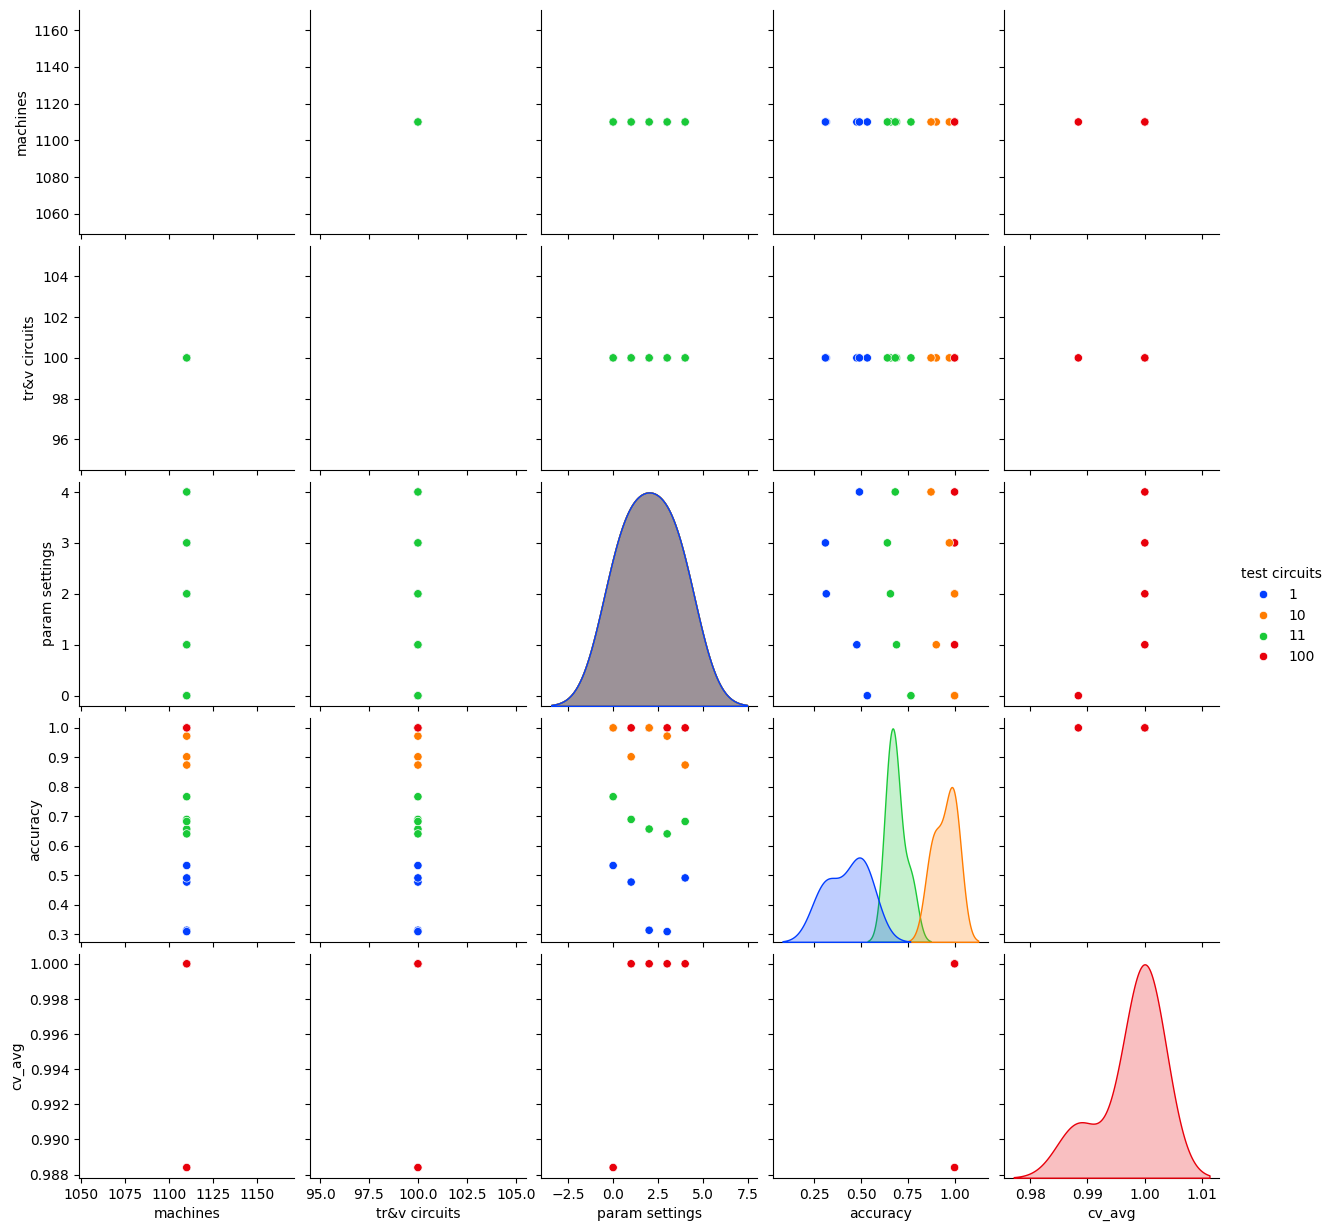

In [113]:
sns.pairplot(data=df_4q_c1_H, hue = 'test circuits', palette='bright')

[Text(42.722222222222214, 0.5, '')]

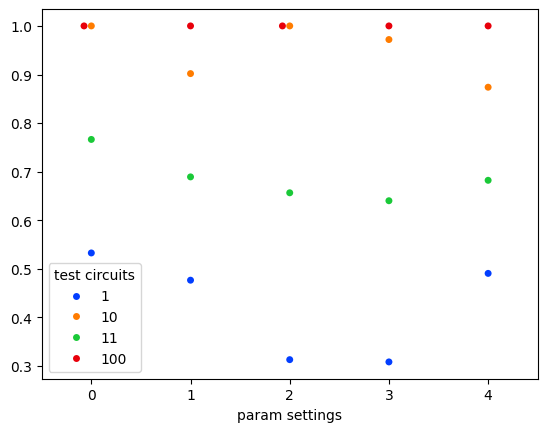

In [115]:
ax = sns.swarmplot(
    data=df_4q_c1_H, 
    x='param settings', y='accuracy',hue = 'test circuits',
    palette = 'bright')
ax.set(ylabel="")

##### mixed train

In [ ]:
df_4q_H = df_4q[df_4q['tr&v exp_type']=='Hardware']
df_4q_H_ct = df_4q_H[df_4q_H['tr&v circuits'] != 111]


In [119]:
df_4q_H_ct=make_easy2plot(df_4q_H_ct)

C:\Users\epste\AppData\Local\Temp\ipykernel_32428\1652720109.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_.loc[:,'cv_avg']=df_.loc[:,'cv_1':'cv_5'].mean(axis =1)


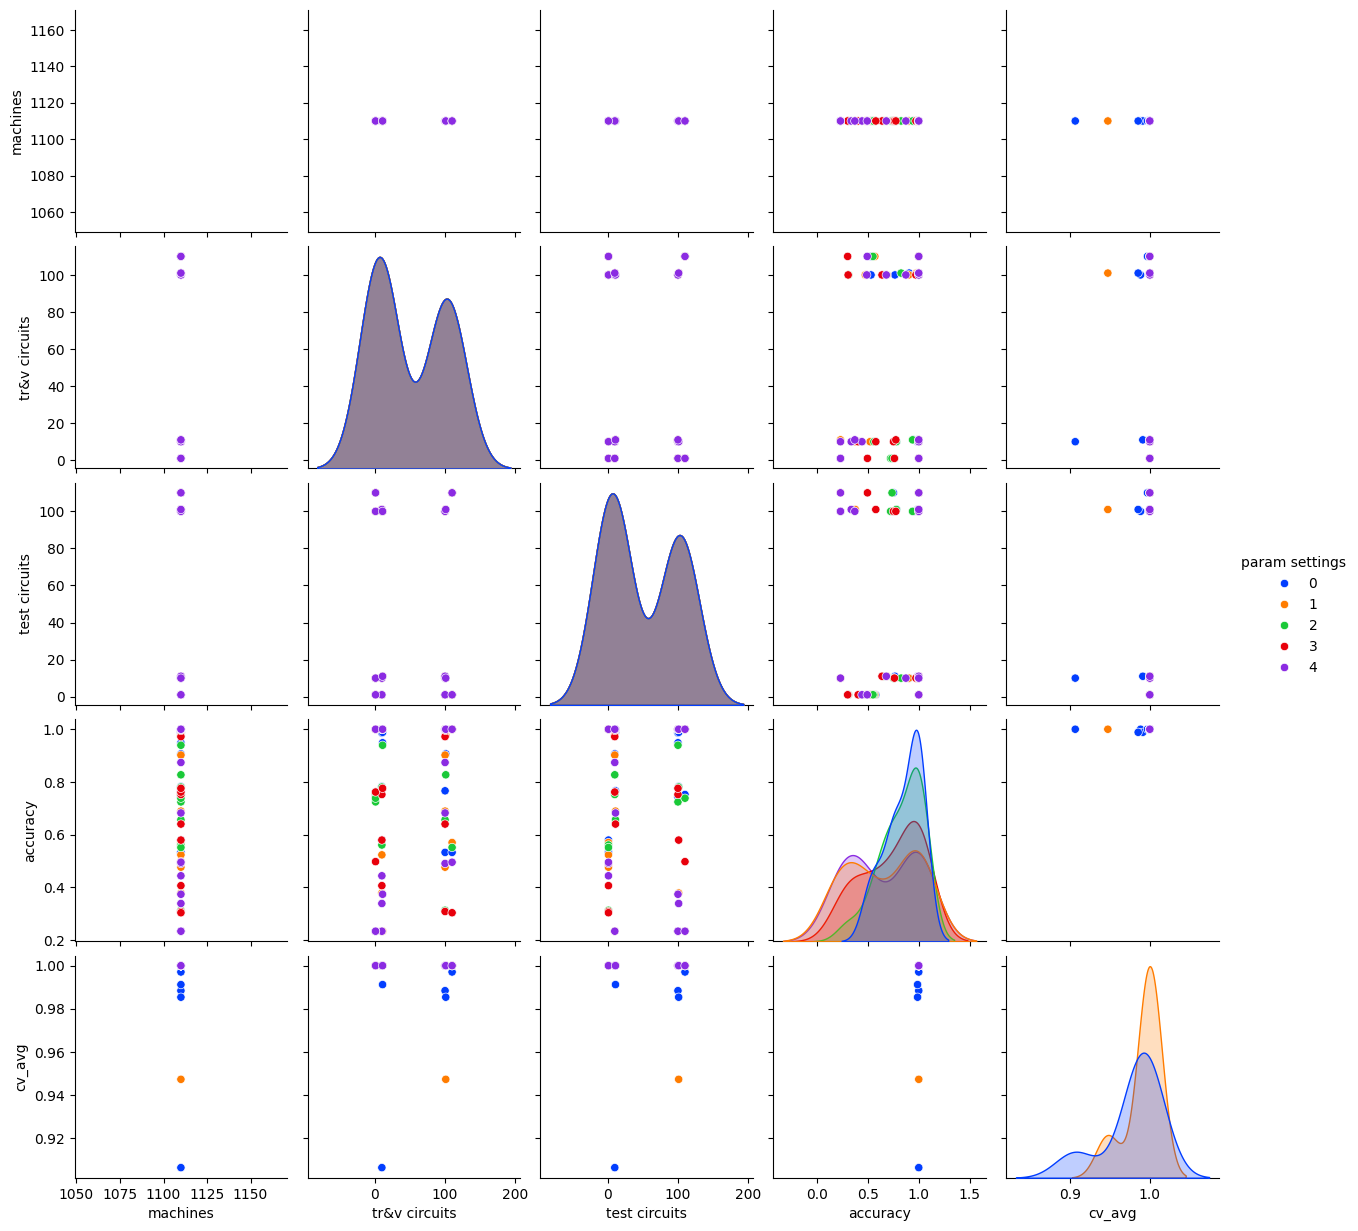

In [123]:
sns.pairplot(data=df_4q_H_ct, hue = 'param settings', palette='bright')

<Axes: xlabel='tr&v circuits', ylabel='test circuits'>

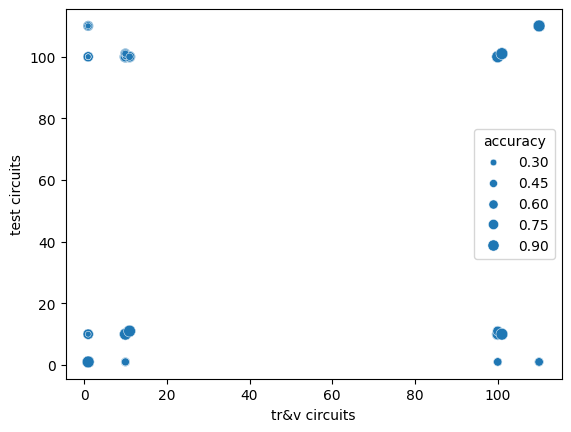

In [126]:
sns.scatterplot(df_4q_H_ct,x = 'tr&v circuits',y='test circuits',size = 'accuracy')

#### Mixed

In [128]:
df_4q_same_circ = get_df_with_same('tr&v circuits','test circuits',df_4q,False)


In [129]:
df_4q_same_circ = make_easy2plot(df_4q_same_circ)

C:\Users\epste\AppData\Local\Temp\ipykernel_32428\1652720109.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_.loc[:,'cv_avg']=df_.loc[:,'cv_1':'cv_5'].mean(axis =1)


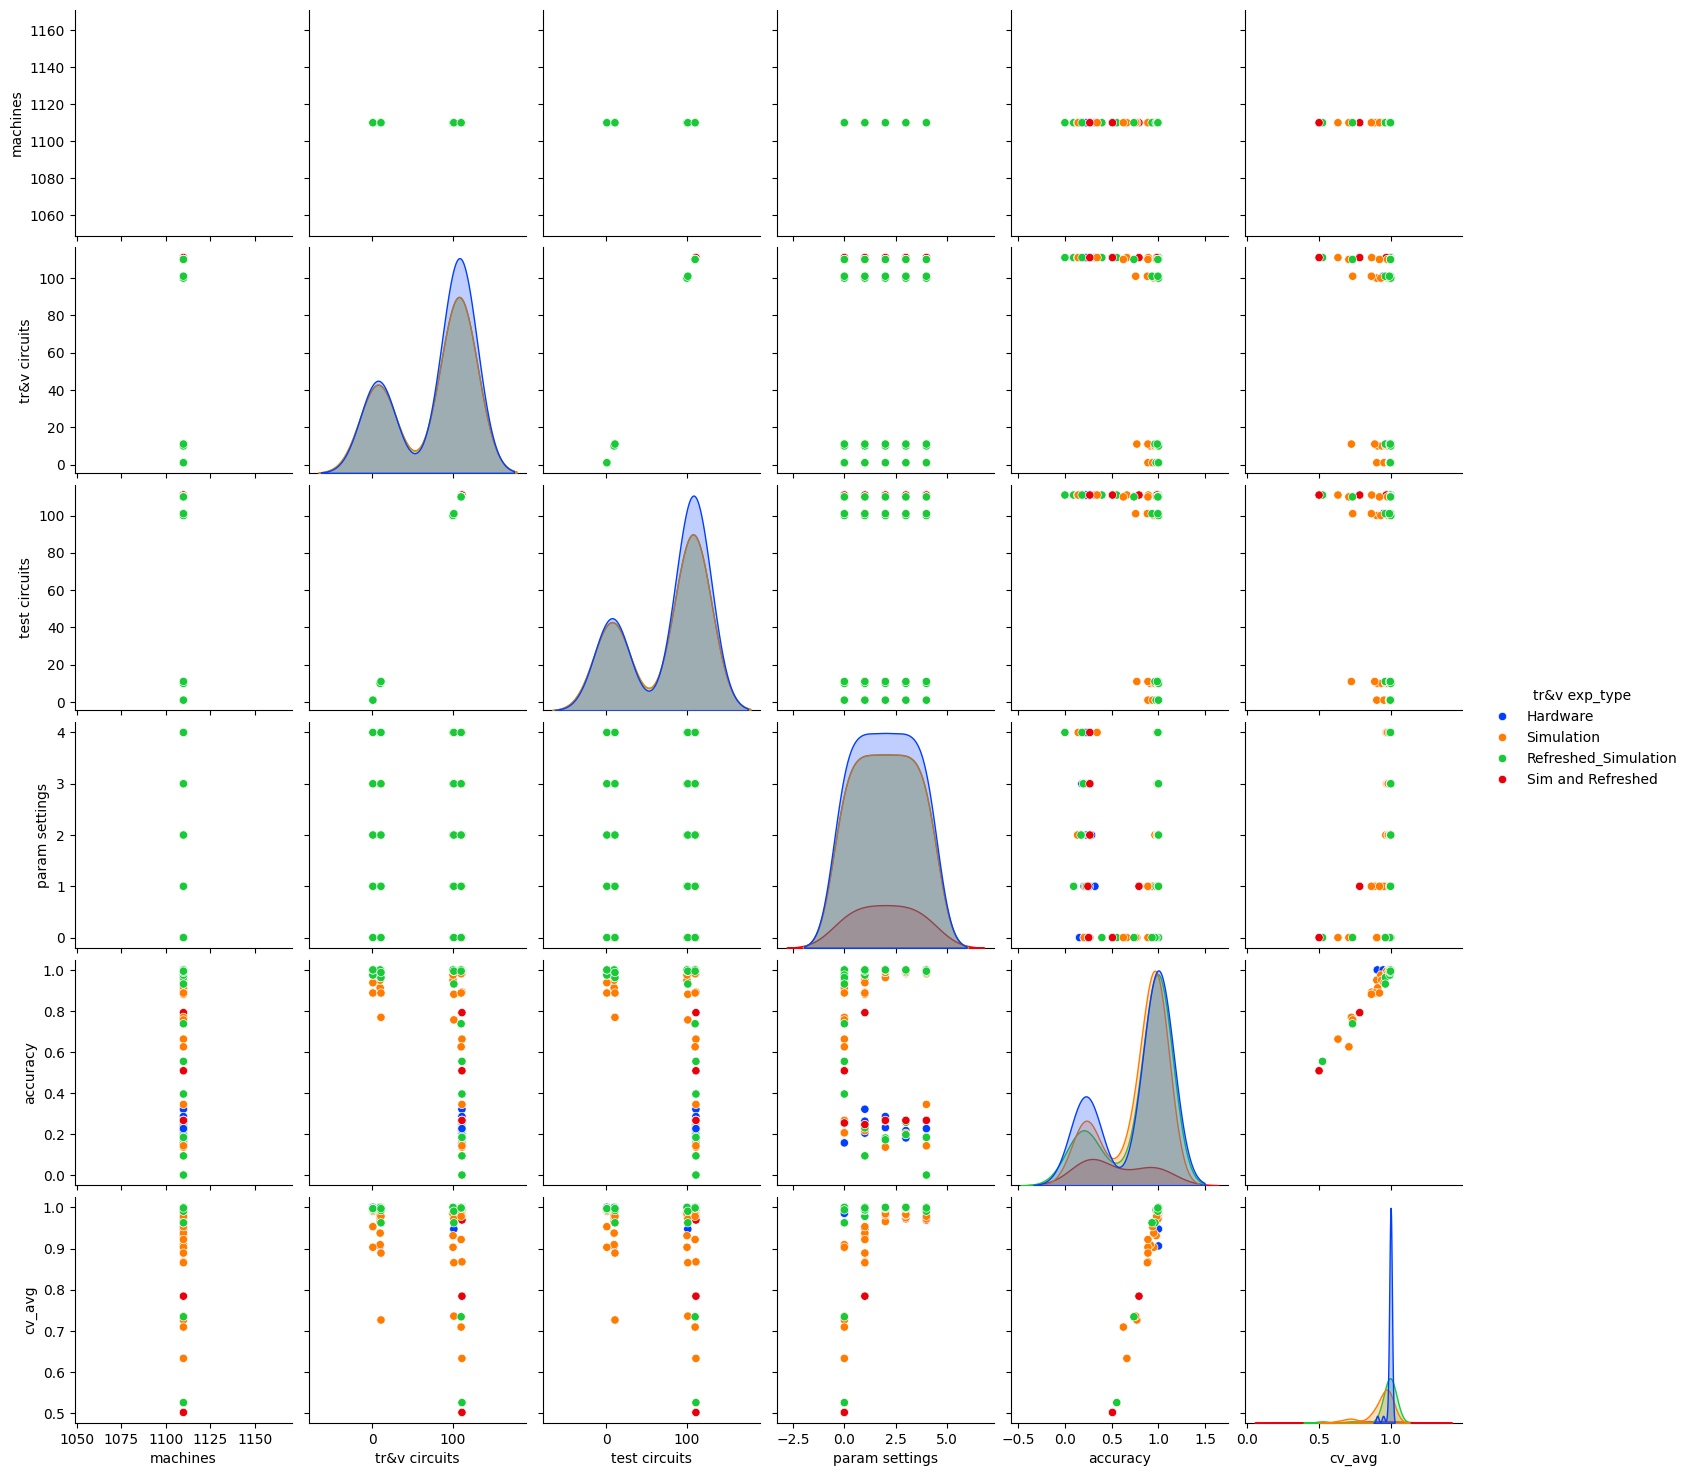

In [131]:
sns.pairplot(df_4q_same_circ, hue = 'tr&v exp_type', palette = 'bright')

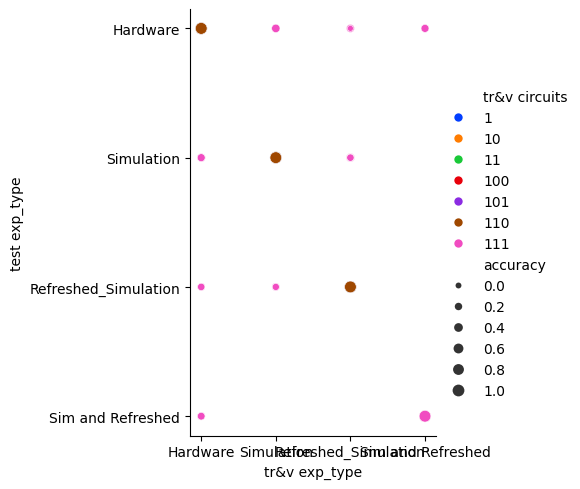

In [133]:
sns.relplot(
    df_4q_same_circ, 
    x='tr&v exp_type', y = 'test exp_type',hue = 'tr&v circuits',
    size = 'accuracy',
    palette = 'bright'
    )

 this one^ would be more interesting if we did the HSR with differetn combos of circuits

c:\Users\epste\anaconda3\envs\qiskE\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 36.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\epste\anaconda3\envs\qiskE\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 8.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\epste\anaconda3\envs\qiskE\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 26.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


[Text(42.722222222222214, 0.5, '')]

c:\Users\epste\anaconda3\envs\qiskE\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 44.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\epste\anaconda3\envs\qiskE\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 13.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\epste\anaconda3\envs\qiskE\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 35.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


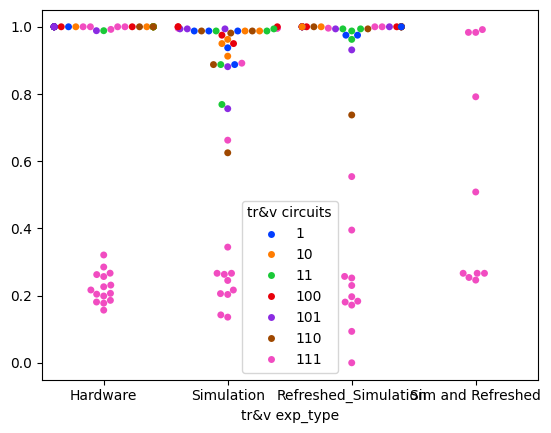

In [136]:
ax = sns.swarmplot(
    data=df_4q_same_circ, 
    x='tr&v exp_type', y='accuracy',hue = 'tr&v circuits',
    palette = 'bright')
ax.set(ylabel="")